In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

E:\conda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
E:\conda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
X,y = mglearn.datasets.make_wave(n_samples=100)
bins = np.linspace(-3,3,11)
which_bin = np.digitize(X,bins=bins)
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)

bins:[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [4]:
X_combined = np.hstack([X,X_binned])
print(X_combined.shape)

(100, 11)


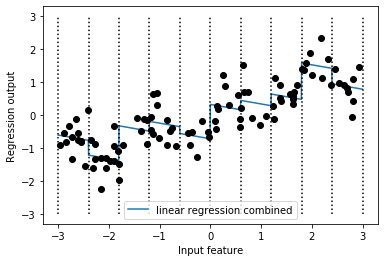

In [7]:
reg = LinearRegression().fit(X_combined,y)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
line_binned = encoder.transform(np.digitize(line,bins=bins))
line_combined = np.hstack([line,line_binned])
plt.plot(line,reg.predict(line_combined),label='linear regression combined')
for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:,0],y,'o',c='k')

In [9]:
X_product = np.hstack([X_binned,X*X_binned])
print(X_product.shape)

(100, 20)


Text(0.5, 0, 'Input feature')

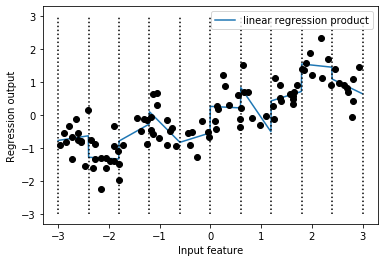

In [11]:
reg = LinearRegression().fit(X_product,y)
line_product = np.hstack([line_binned,line*line_binned])
plt.plot(line,reg.predict(line_product),label='linear regression product')
for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

In [15]:
from sklearn.preprocessing import PolynomialFeatures
#包含直到X**10的多项式
#默认的include——bias=true添加恒等于1的常数特征
poly = PolynomialFeatures(degree=10,include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [16]:
print("X_poly.shape{}".format(X_poly.shape))

X_poly.shape(100, 10)


In [17]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [18]:
print("Polynominal feature names:\n{}".format(poly.get_feature_names()))

Polynominal feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


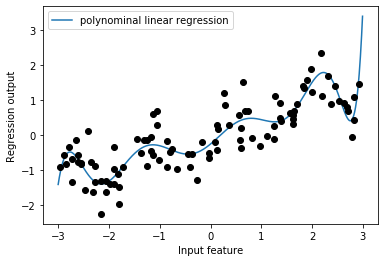

In [19]:
reg = LinearRegression().fit(X_poly,y)
line_poly = poly.transform(line)
plt.plot(line,reg.predict(line_poly),label='polynominal linear regression')
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

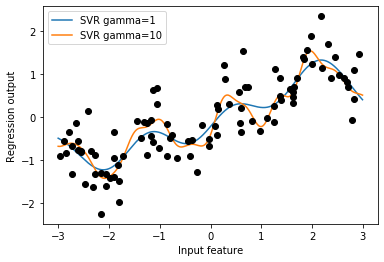

In [20]:
from sklearn.svm import SVR
for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line),label='SVR gamma={}'.format(gamma))
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [21]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
boston = load_boston()
X_train,X_test,y_train,y_test=train_test_split(boston.data,boston.target,random_state=0)
#缩放数据
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
poly=PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly=poly.transform(X_train_scaled)
X_test_poly=poly.transform(X_test_scaled)
print("X_train.shape:{}".format(X_train.shape))
print("X_train_poly.shape:{}".format(X_train_poly.shape))

X_train.shape:(379, 13)
X_train_poly.shape:(379, 105)


In [24]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [25]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train_scaled,y_train)
print("Score without interactions:{:.3f}".format(ridge.score(X_test_scaled,y_test)))
ridge=Ridge().fit(X_train_poly,y_train)
print("Score without interactions:{:.3f}".format(ridge.score(X_test_poly,y_test)))

Score without interactions:0.621
Score without interactions:0.753


In [26]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100).fit(X_train_scaled,y_train)
print("Score without interactions:{:.3f}".format(rf.score(X_test_scaled,y_test)))
rf=RandomForestRegressor(n_estimators=100).fit(X_train_poly,y_train)
print("Score without interactions:{:.3f}".format(rf.score(X_test_poly,y_test)))

Score without interactions:0.799
Score without interactions:0.774


In [27]:
rnd=np.random.RandomState(0)
X_org=rnd.normal(size=(1000,3))
w=rnd.normal(size=3)
X=rnd.poisson(10*np.exp(X_org))
y=np.dot(X_org,w)
print("Number of feature appearances:\n{}".format(np.bincount(X[:,0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

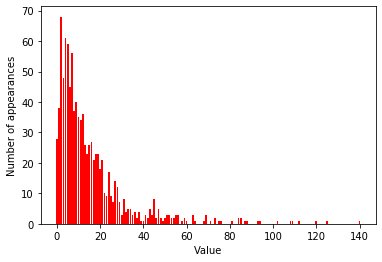

In [38]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='r')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
score=Ridge().fit(X_train,y_train).score(X_test,y_test)
print("Test score:{:.3f}".format(score))

Test score:0.622


Text(0.5, 0, 'Value')

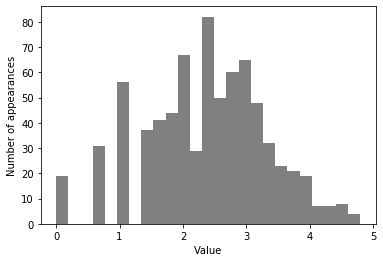

In [40]:
X_train_log=np.log(X_train+1)
X_test_log=np.log(X_test+1)
plt.hist(X_train_log[:,0],bins=25,color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [41]:
score=Ridge().fit(X_train_log,y_train).score(X_test_log,y_test)
print("Test score:{:.3f}".format(score))

Test score:0.875


In [ ]:
#线性模型从显示变换，如分箱，交互项或多项式中受益

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
cancer=load_breast_cancer()
#获得确定性的随机数
rng=np.random.RandomState(42)
noise=rng.normal(size=(len(cancer.data),50))
#向数据中添加噪声特征
#前30个特征来自数据集，后50个是噪声
X_w_noise=np.hstack([cancer.data,noise])
X_train,X_test,y_train,y_test=train_test_split(X_w_noise,cancer.target,random_state=0,test_size=.5)
#使用f_classif（默认值）和selectpercentile来选择50%的特征
select=SelectPercentile(percentile=50)
select.fit(X_train,y_train)
#对训练集进行变换
X_train_selected=select.transform(X_train)
print("X_train.shape:{}".format(X_train.shape))
print("X_train_selected.shape:{}".format(X_train_selected.shape))

X_train.shape:(284, 80)
X_train_selected.shape:(284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'sample index')

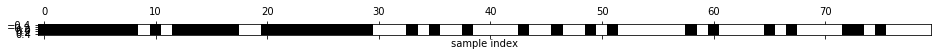

In [47]:
mask=select.get_support()
print(mask)
#将遮罩可视化，黑色为True，白色为False
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("sample index")

In [49]:
#对测试数据进行变换
X_test_selected=select.transform(X_test)
lr=LogisticRegression(max_iter=100000)
lr.fit(X_train,y_train)
print("Score with all features:{:.3f}".format(lr.score(X_test,y_test)))
lr.fit(X_train_selected,y_train)
print("Score with only selected features:{:.3f}".format(lr.score(X_test_selected,y_test)))

Score with all features:0.951
Score with only selected features:0.933
